In [1]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import binarize
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0  # Normalize to [0,1] and flatten
X_test = X_test.reshape(-1, 784) / 255.0

# Binarize the images, as RBMs work best with binary input
X_train_bin = binarize(X_train, threshold=0.5)
X_test_bin = binarize(X_test, threshold=0.5)

# Initialize RBM
rbm = BernoulliRBM(n_components=128, learning_rate=0.06, n_iter=10, random_state=0)

# Fit RBM to the MNIST training data
rbm.fit(X_train_bin)

# Extract embeddings (transform) for train and test sets
X_train_embedded = rbm.transform(X_train_bin)
X_test_embedded = rbm.transform(X_test_bin)

print("Embedding shape:", X_train_embedded.shape)  # (60000, 128) for 128-dimensional embedding


11490434/11490434 [==============================] - 1s 0us/step
Embedding shape: (60000, 128)


In [2]:
X_test_embedded

array([[3.01439134e-20, 3.95686259e-01, 1.00743311e-05, ...,
        1.99588194e-17, 8.58629009e-06, 1.79848819e-10],
       [5.39026244e-26, 4.07894691e-09, 1.31626236e-01, ...,
        3.17202157e-28, 4.24903787e-01, 1.15105498e-18],
       [9.99921589e-01, 8.05938199e-08, 1.87605609e-02, ...,
        3.19659598e-03, 2.32786180e-08, 1.40051763e-05],
       ...,
       [1.41089008e-09, 2.75346387e-03, 1.13604835e-09, ...,
        2.88187489e-06, 6.69489176e-11, 5.54348966e-05],
       [1.83712866e-14, 5.27679627e-12, 9.49430901e-01, ...,
        7.87468295e-17, 6.69125775e-01, 9.89239705e-17],
       [1.24620532e-22, 2.85271299e-01, 1.66605907e-32, ...,
        4.03953526e-22, 9.86732655e-19, 2.17962286e-19]])

In [5]:
from umap import UMAP
import matplotlib.pyplot as plt

/Users/yijwang-admin/anaconda3/envs/tf/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


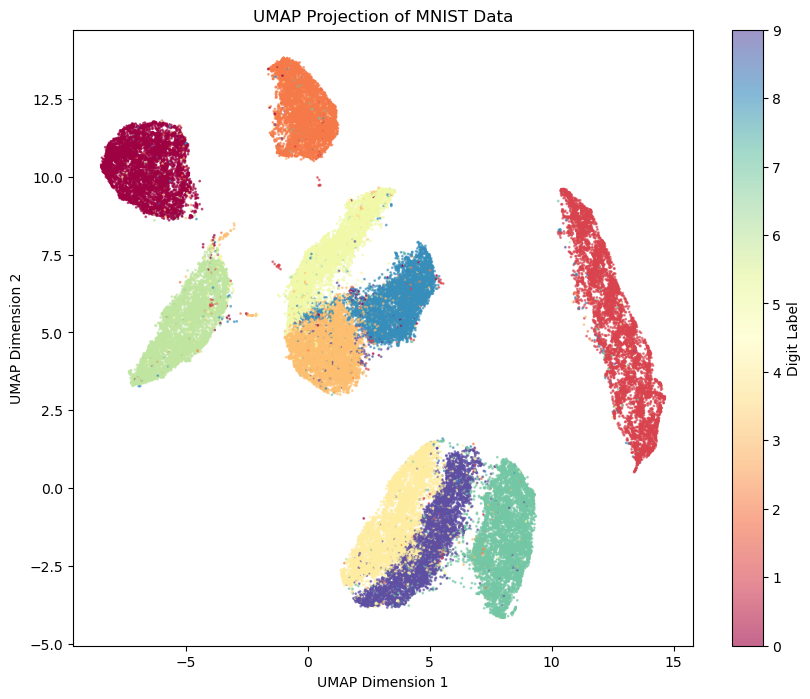

In [9]:
# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_train_umap = umap.fit_transform(X_train_embedded)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP Projection of MNIST Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

/Users/yijwang-admin/anaconda3/envs/tf/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


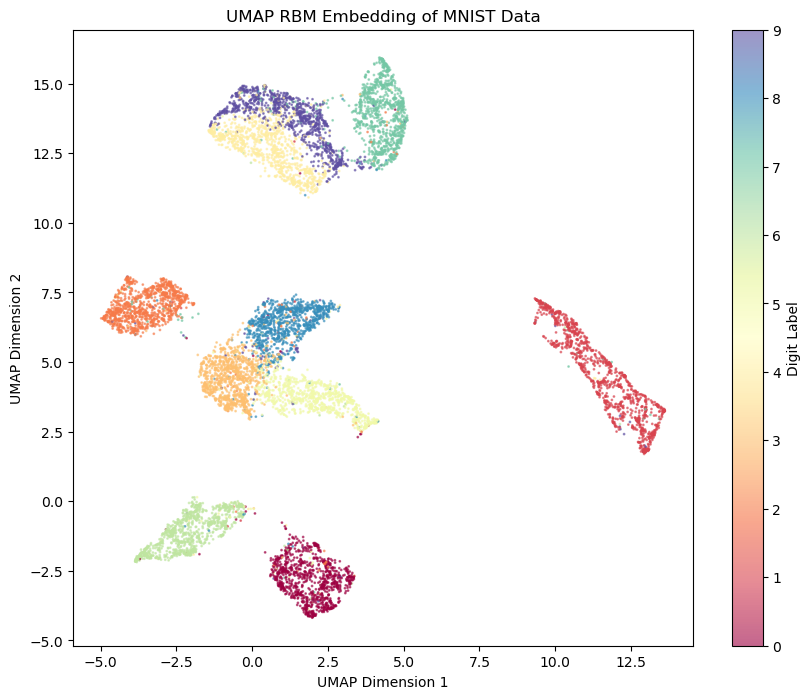

In [15]:
# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_test_umap = umap.fit_transform(X_test_embedded)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP RBM Embedding of MNIST Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


In [13]:
# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_test_umap = umap.fit_transform(X_test_embedded)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP Projection of MNIST Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


(10000, 2)